Problem Statement: Understand a tagert customer to plan a strategy
Requirements: Identify all important groups by income age and shopping score 
Objective: Divide the population in group as per geographical info.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("Mall_Customers.csv")

In [7]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


# Univariate Analysis

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Mean is 60.560000 and median is 61.50000. it means itis going to be normal distribution

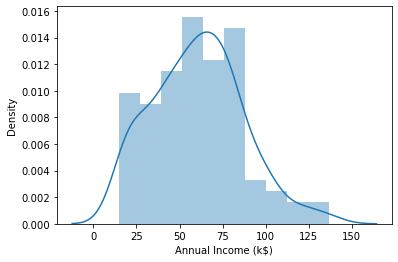

In [10]:
#histogram to display the distibution
sns.distplot(df['Annual Income (k$)']);

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

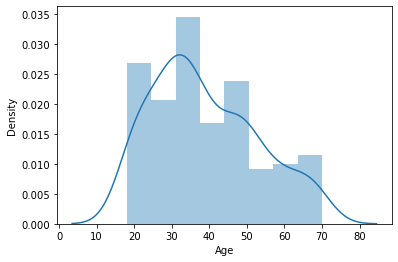

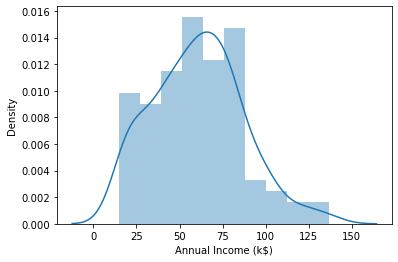

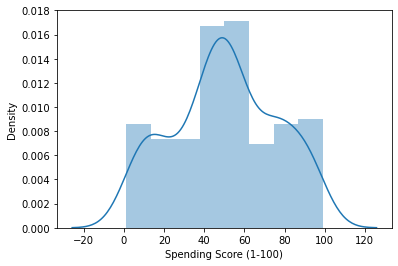

In [11]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

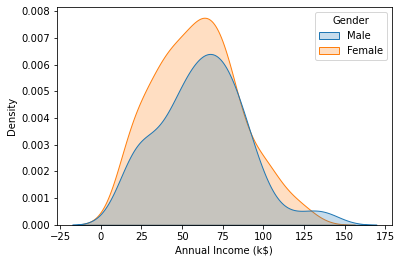

In [8]:
sns.kdeplot(df['Annual Income (k$)'],shade=True,hue=df['Gender']);

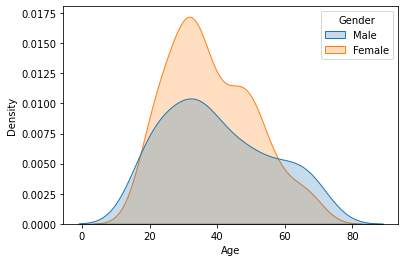

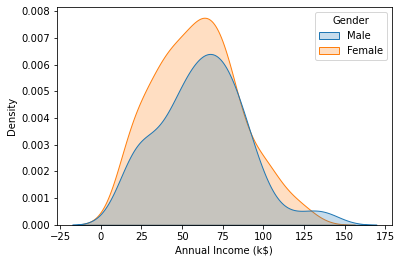

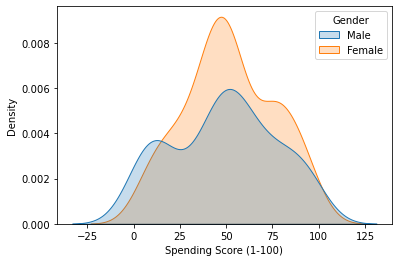

In [9]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['Gender'])

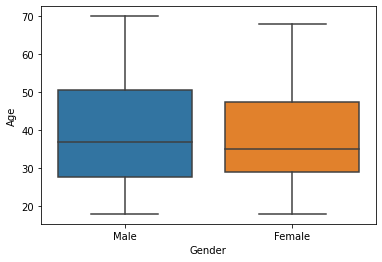

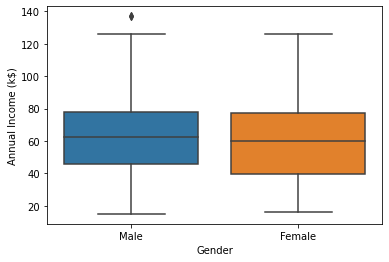

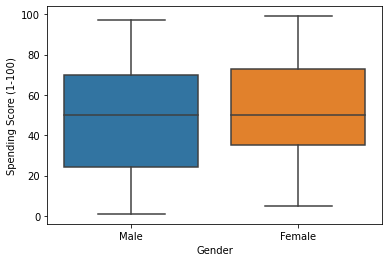

In [10]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [11]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

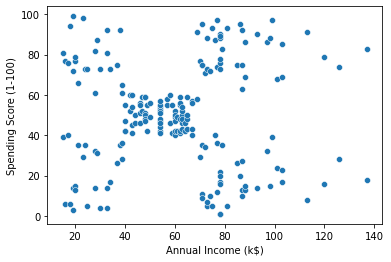

In [12]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' );

In [24]:
df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}, inplace=True)

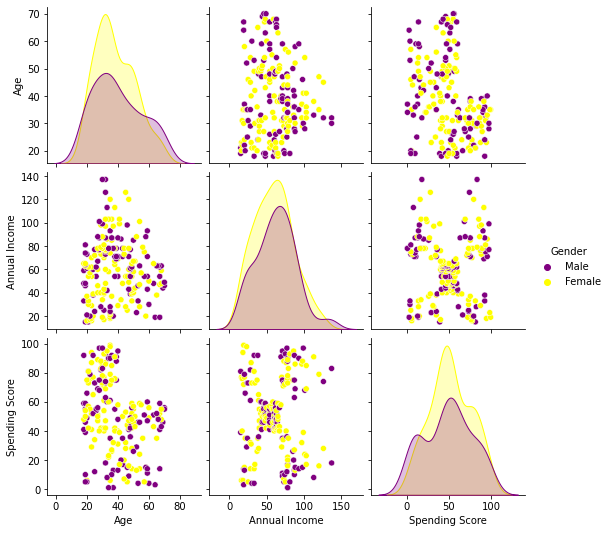

In [37]:
#df=df.drop('CustomerID',axis=1)
custom_palette = {'Male': 'purple', 'Female': 'yellow'}
plot=sns.pairplot(df,hue='Gender', palette=custom_palette);


In [27]:
df.groupby(['Gender'])['Age', 'Annual Income',
       'Spending Score'].mean()

,Age,Annual Income,Spending Score
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [29]:
df.corr()

,Age,Annual Income,Spending Score
Age,1.000000,-0.012398,-0.327227
Annual Income,-0.012398,1.000000,0.009903
Spending Score,-0.327227,0.009903,1.000000


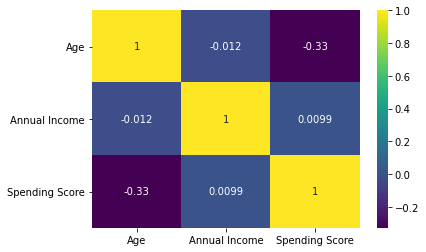

In [34]:
sns.heatmap(df.corr(),annot=True,cmap='viridis');

# Clustering - Univariate, Bivariate, Multivariate

In [39]:
clustering1 = KMeans(n_clusters=3)

In [40]:
clustering1.fit(df[['Annual Income']])

KMeans(n_clusters=3)

In [41]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [42]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income,Spending Score,Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [43]:
df['Income Cluster'].value_counts()

1    92
0    72
2    36
Name: Income Cluster, dtype: int64

In [44]:
#inertia represent distance between centroids
clustering1.inertia_

23528.152173913048

In [45]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income']])
    intertia_scores.append(kmeans.inertia_)

In [40]:
intertia_scores

[137277.2800000002,
 48660.88888888887,
 23528.152173913048,
 13278.112713472474,
 8481.49619047619,
 5081.484660267269,
 3931.9880952380995,
 2857.4416971916967,
 2293.9049707602344,
 1736.5656510156507]

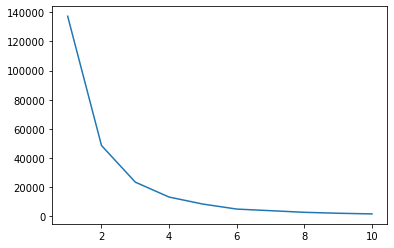

In [46]:
plt.plot(range(1,11),intertia_scores);

In [47]:
df.columns

Index(['Gender', 'Age', 'Annual Income', 'Spending Score', 'Income Cluster'], dtype='object')

In [48]:
df.groupby('Income Cluster')['Age', 'Annual Income',
       'Spending Score'].mean()

,Age,Annual Income,Spending Score
Income Cluster,,,
0,38.930556,33.027778,50.166667
1,39.184783,66.717391,50.054348
2,37.833333,99.888889,50.638889


In [ ]:
#Bivariate Clustering

In [49]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income','Spending Score']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,Gender,Age,Annual Income,Spending Score,Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,2
2,Female,20,16,6,0,4
3,Female,23,16,77,0,2
4,Female,31,17,40,0,4


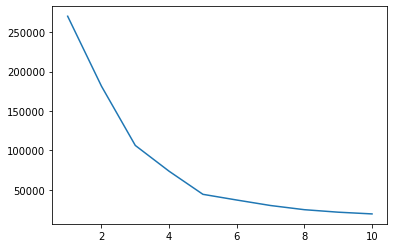

In [51]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income','Spending Score']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [52]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

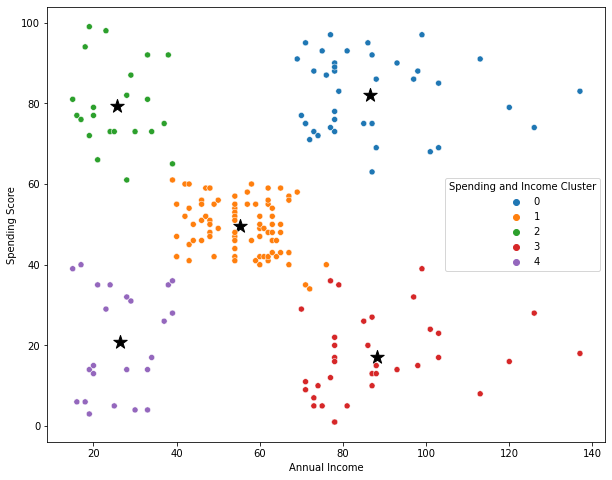

In [56]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=200,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income',y='Spending Score',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [57]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.592593,0.407407
2,0.590909,0.409091
3,0.457143,0.542857
4,0.608696,0.391304


In [59]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income',
       'Spending Score'].mean()

,Age,Annual Income,Spending Score
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,42.716049,55.296296,49.518519
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [60]:
#mulivariate clustering 
from sklearn.preprocessing import StandardScaler

In [61]:
scale = StandardScaler()

In [62]:
df.head()

,Gender,Age,Annual Income,Spending Score,Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,2
2,Female,20,16,6,0,4
3,Female,23,16,77,0,2
4,Female,31,17,40,0,4


In [63]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income,Spending Score,Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,0,4,1
1,21,15,81,0,2,1
2,20,16,6,0,4,0
3,23,16,77,0,2,0
4,31,17,40,0,4,0


In [64]:
dff.columns

Index(['Age', 'Annual Income', 'Spending Score', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [65]:
dff = dff[['Age', 'Annual Income', 'Spending Score','Gender_Male']]
dff.head()

,Age,Annual Income,Spending Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [67]:
dff = scale.fit_transform(dff)

In [68]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


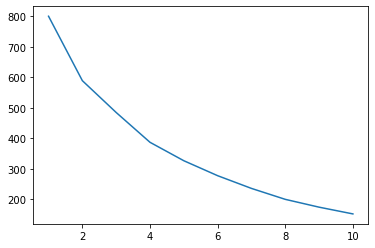

In [69]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3);

In [71]:
df

,Gender,Age,Annual Income,Spending Score,Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,2
2,Female,20,16,6,0,4
3,Female,23,16,77,0,2
4,Female,31,17,40,0,4
...,...,...,...,...,...,...
195,Female,35,120,79,2,0
196,Female,45,126,28,2,3
197,Male,32,126,74,2,0
198,Male,32,137,18,2,3


In [72]:
df.to_csv('Clustering.csv')

Target cluster is cluster 2 which has higher spending score and high income score
59% of cluster 2 isfemale and 40% male
cluster 2 presents an intereing opportunity to market to the customers for sales event on popular items
